## Assignment is below at the bottom

Bo Coleman

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [16]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import tensorflow as tf

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [2]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [17]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), loss='binary_crossentropy')

In [20]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.3083 - val_loss: 0.2636
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2588 - val_loss: 0.2556
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2527 - val_loss: 0.2515
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2451 - val_loss: 0.2393
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2367 - val_loss: 0.2330
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2287 - val_loss: 0.2243
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2229 - val_loss: 0.2196
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2192 - val_loss: 0.2182
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2161 - val_loss: 0.2141
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2133 - v

235/235 [==============================] - 3s 11ms/step - loss: 0.1677 - val_loss: 0.1693
Epoch 81/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1669 - val_loss: 0.1665
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1660 - val_loss: 0.1652
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1652 - val_loss: 0.1652
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1648 - val_loss: 0.1642
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1640 - val_loss: 0.1648
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1638 - val_loss: 0.1652
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1633 - val_loss: 0.1645
Epoch 88/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1628 - val_loss: 0.1628
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1626 - 

In [26]:
print(autoencoder.history.history['loss'][-1])
print(autoencoder.history.history['val_loss'][-1])

0.1592901647090912
0.1603124886751175


In [14]:
encoded_imgs

array([[0.        , 0.        , 0.72513944, 0.351182  ],
       [0.        , 0.03256052, 0.5238815 , 0.25990415],
       [0.        , 0.1656361 , 0.42694584, 0.04125106],
       ...,
       [0.00650312, 0.10881521, 0.90697086, 0.50048065],
       [0.        , 0.        , 0.81989694, 0.7256719 ],
       [0.        , 0.2757062 , 0.5277643 , 0.9601328 ]], dtype=float32)

In [8]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

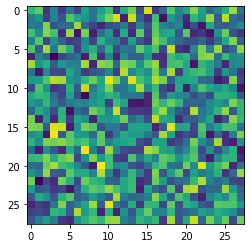

In [10]:
import matplotlib.pyplot as plt
plt.imshow(noise_preds[1].reshape(28,28))

In [13]:
np.max(encoded_imgs)

1.7931124

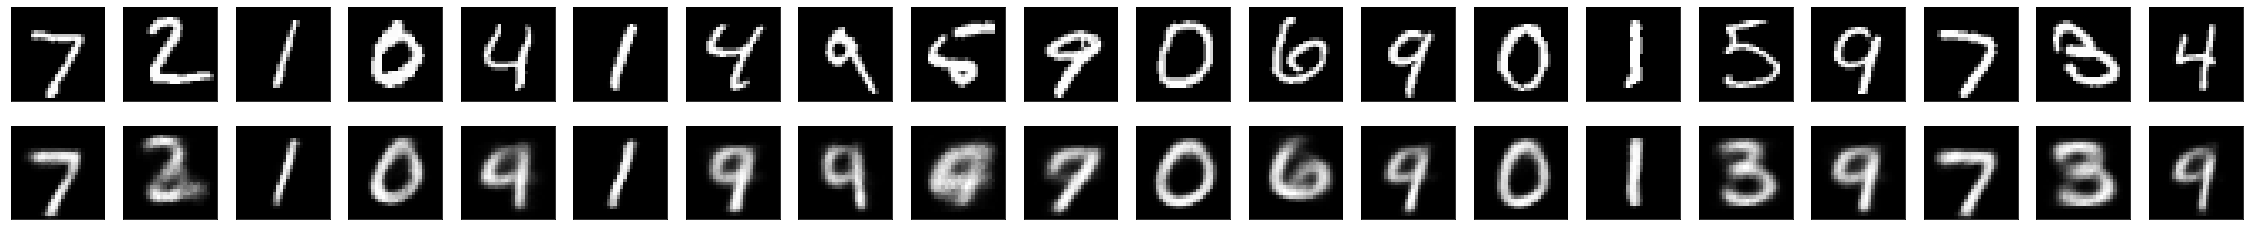

In [27]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
encoded_imgs

array([[11.943697 ,  9.005527 , 12.027234 , 32.89881  ],
       [23.76052  , 13.926956 ,  5.6552634,  8.942506 ],
       [35.62965  , 34.729908 , 24.666973 , 41.5047   ],
       ...,
       [ 5.3135986, 11.108302 , 14.398285 , 17.106884 ],
       [ 4.376413 , 19.419018 , 15.854642 , 11.992302 ],
       [ 7.41167  , 18.699078 , 30.420742 , 11.0364065]], dtype=float32)

In [26]:
%matplotlib inline

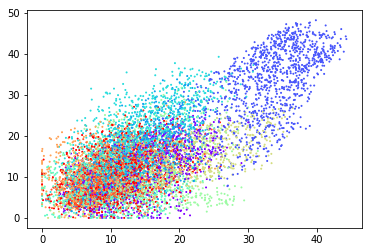

In [34]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

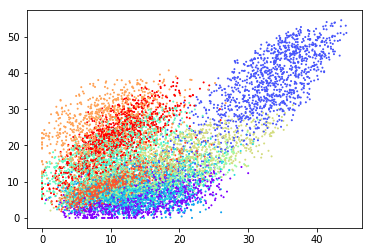

In [35]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

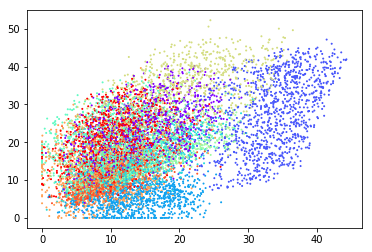

In [36]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

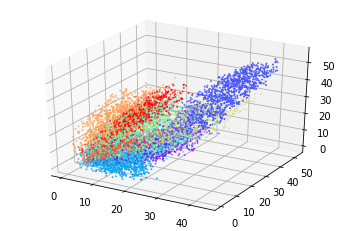

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [28]:
losses = []
val_losses = []
dimensions = np.arange(2, 18, 2)
for encoding_dim in dimensions:
    
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    encoded_input = Input(shape=(encoding_dim,))

    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), loss='binary_crossentropy')
    
    autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
    
    loss = autoencoder.history.history['loss'][-1]
    val_loss = autoencoder.history.history['val_loss'][-1]
    
    losses.append(loss)
    val_losses.append(val_loss)

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.3461 - val_loss: 0.2628
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2582 - val_loss: 0.2536
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2476 - val_loss: 0.2411
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2387 - val_loss: 0.2358
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2337 - val_loss: 0.2316
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2297 - val_loss: 0.2283
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2274 - val_loss: 0.2259
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2260 - val_loss: 0.2246
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2248 - val_loss: 0.2245
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2237 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1894 - val_loss: 0.1911
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1892 - val_loss: 0.1921
Epoch 82/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1891 - val_loss: 0.1914
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1889 - val_loss: 0.1903
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1888 - val_loss: 0.1904
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1886 - val_loss: 0.1901
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1884 - val_loss: 0.1903
Epoch 87/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1882 - val_loss: 0.1907
Epoch 88/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1881 - val_loss: 0.1900
Epoch 89/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1879 - 

235/235 [==============================] - 3s 13ms/step - loss: 0.1612 - val_loss: 0.1611
Epoch 60/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1609 - val_loss: 0.1611
Epoch 61/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1606 - val_loss: 0.1612
Epoch 62/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1605 - val_loss: 0.1611
Epoch 63/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1601 - val_loss: 0.1603
Epoch 64/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1600 - val_loss: 0.1601
Epoch 65/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1597 - val_loss: 0.1594
Epoch 66/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1594 - val_loss: 0.1597
Epoch 67/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1591 - val_loss: 0.1595
Epoch 68/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1589 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1616 - val_loss: 0.1606
Epoch 39/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1608 - val_loss: 0.1613
Epoch 40/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1602 - val_loss: 0.1602
Epoch 41/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1597 - val_loss: 0.1614
Epoch 42/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1592 - val_loss: 0.1579
Epoch 43/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1586 - val_loss: 0.1583
Epoch 44/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1581 - val_loss: 0.1576
Epoch 45/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1575 - val_loss: 0.1582
Epoch 46/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1571 - val_loss: 0.1571
Epoch 47/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1567 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1631 - val_loss: 0.1640
Epoch 18/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1614 - val_loss: 0.1592
Epoch 19/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1596 - val_loss: 0.1571
Epoch 20/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1578 - val_loss: 0.1565
Epoch 21/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1563 - val_loss: 0.1547
Epoch 22/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1551 - val_loss: 0.1536
Epoch 23/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1537 - val_loss: 0.1523
Epoch 24/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1525 - val_loss: 0.1497
Epoch 25/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1511 - val_loss: 0.1513
Epoch 26/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1500 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1221 - val_loss: 0.1217
Epoch 97/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1219 - val_loss: 0.1225
Epoch 98/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1218 - val_loss: 0.1238
Epoch 99/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1217 - val_loss: 0.1218
Epoch 100/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1215 - val_loss: 0.1211
Epoch 1/100
235/235 [==============================] - 4s 14ms/step - loss: 0.3344 - val_loss: 0.2637
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.2580 - val_loss: 0.2548
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2460 - val_loss: 0.2386
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2309 - val_loss: 0.2241
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2212 - val_

235/235 [==============================] - 3s 12ms/step - loss: 0.1208 - val_loss: 0.1197
Epoch 76/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1207 - val_loss: 0.1211
Epoch 77/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1204 - val_loss: 0.1201
Epoch 78/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1203 - val_loss: 0.1202
Epoch 79/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1202 - val_loss: 0.1198
Epoch 80/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1200 - val_loss: 0.1208
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1198 - val_loss: 0.1189
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1197 - val_loss: 0.1189
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1195 - val_loss: 0.1204
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1192 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1226 - val_loss: 0.1209
Epoch 55/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1223 - val_loss: 0.1207
Epoch 56/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1220 - val_loss: 0.1213
Epoch 57/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1218 - val_loss: 0.1208
Epoch 58/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1214 - val_loss: 0.1205
Epoch 59/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1211 - val_loss: 0.1201
Epoch 60/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1207 - val_loss: 0.1200
Epoch 61/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1205 - val_loss: 0.1193
Epoch 62/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1202 - val_loss: 0.1192
Epoch 63/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1200 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1321 - val_loss: 0.1301
Epoch 34/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1309 - val_loss: 0.1308
Epoch 35/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1299 - val_loss: 0.1304
Epoch 36/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1289 - val_loss: 0.1265
Epoch 37/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1280 - val_loss: 0.1253
Epoch 38/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1273 - val_loss: 0.1261
Epoch 39/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1264 - val_loss: 0.1245
Epoch 40/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1258 - val_loss: 0.1238
Epoch 41/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1251 - val_loss: 0.1233
Epoch 42/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1244 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1533 - val_loss: 0.1515
Epoch 13/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1502 - val_loss: 0.1468
Epoch 14/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1472 - val_loss: 0.1442
Epoch 15/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1448 - val_loss: 0.1424
Epoch 16/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1426 - val_loss: 0.1399
Epoch 17/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1409 - val_loss: 0.1395
Epoch 18/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1390 - val_loss: 0.1365
Epoch 19/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1373 - val_loss: 0.1345
Epoch 20/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1359 - val_loss: 0.1345
Epoch 21/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1346 - 

235/235 [==============================] - 3s 12ms/step - loss: 0.1048 - val_loss: 0.1045
Epoch 92/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1046 - val_loss: 0.1035
Epoch 93/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1043 - val_loss: 0.1035
Epoch 94/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1042 - val_loss: 0.1026
Epoch 95/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1042 - val_loss: 0.1028
Epoch 96/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1038 - val_loss: 0.1028
Epoch 97/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1038 - val_loss: 0.1030
Epoch 98/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1035 - val_loss: 0.1030
Epoch 99/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1034 - val_loss: 0.1026
Epoch 100/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1032 -

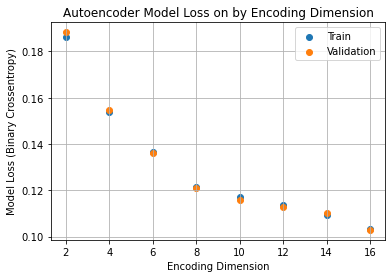

In [29]:
plt.figure()
plt.scatter(dimensions, losses, label = 'Train')
plt.scatter(dimensions, val_losses, label = 'Validation')
plt.xlabel('Encoding Dimension')
plt.ylabel('Model Loss (Binary Crossentropy)')
plt.title('Autoencoder Model Loss on by Encoding Dimension')
plt.grid(True)
plt.legend()
plt.show()



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [38]:
xtrain_noise = xtrain + np.random.normal(0.5, 0.2, size=xtrain.shape)
xtest_noise = xtest + np.random.normal(0.5, 0.2, size=xtest.shape)

In [39]:
encoding_dim = 8
x = input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), loss='binary_crossentropy')

autoencoder.fit(xtrain_noise, xtrain,
            epochs=100,
            batch_size=256,
            shuffle=True,
            validation_data=(xtest_noise, xtest))

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.3013 - val_loss: 0.2618
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2556 - val_loss: 0.2494
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2395 - val_loss: 0.2302
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.2265 - val_loss: 0.2203
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2164 - val_loss: 0.2103
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2055 - val_loss: 0.2007
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1959 - val_loss: 0.1893
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1869 - val_loss: 0.1819
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1790 - val_loss: 0.1775
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1732

235/235 [==============================] - 3s 12ms/step - loss: 0.1276 - val_loss: 0.1282
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1276 - val_loss: 0.1289
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1274 - val_loss: 0.1282
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1272 - val_loss: 0.1283
Epoch 84/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1272 - val_loss: 0.1277
Epoch 85/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1269 - val_loss: 0.1275
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1268 - val_loss: 0.1274
Epoch 87/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1267 - val_loss: 0.1275
Epoch 88/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1264 - val_loss: 0.1276
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1263 - 

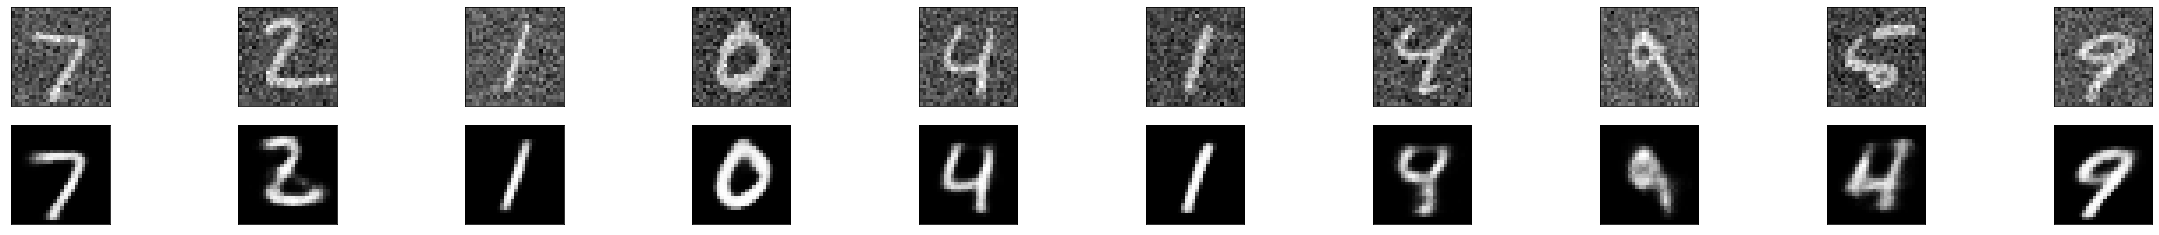

In [40]:
encoded_imgs = encoder.predict(xtest_noise)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(40, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()